Datentypen, Dimension, Seperators checken bei Bereinigung (manuel), ob Werte auch die, die wir erwarten.
EDA alles was nicht Modellierung und Statistisch ist. nur Histogramm, Boxplot etc. Mindestens 2 (z.b: Limeplot. werte Range mit Boxplot etc. Pairplot, Zeitlicher Lag von Closing/Opening Prises, Volumen, Volumen-Preis skettered Plot correlation). Also nur Explorative Datenanalyse für Verständnis und Hypothesen erstellen kann.
Modell: Erweitertest Framework nehmen für Zusatzpunkte. Gäbe noch  nn => Nochmals prüfen. Was steckt dahinter? Pytorch wäre eine Option oder Lstm (Long short term memory network) 
Müssen wissen, welches NN verwendet wird => kommentieren (Torch.nn)
7: Regression r^2 etc. 
classification wäre confusion matrix. Wir haben Regressionproblem, RMSE, MAPE (sicher dazu nehmen)
Kreativitätspunkt: Technische Analyse einbauen.

## 1 Datenerhebung mittels API & Web Scraping

In [1]:
# Import modules
import pandas as pd
import numpy as np
import seaborn as sns
import time
import datetime
from pandas_datareader import data
from sklearn.model_selection import train_test_split


### 1.1 Yahoo Finance API: Aktienkurs

In [2]:
# Import modules
import pandas as pd
import time
import datetime

# Get Ticket Quotes from Yahoo Finance
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 2, 1, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)

# Save data to a CSV file
data.to_csv('AAPL Prices.csv')

print(data)


            Date        Open        High         Low       Close   Adj Close   
0     2010-01-04    7.622500    7.660714    7.585000    7.643214    6.496294  \
1     2010-01-05    7.664286    7.699643    7.616071    7.656429    6.507525   
2     2010-01-06    7.656429    7.686786    7.526786    7.534643    6.404015   
3     2010-01-07    7.562500    7.571429    7.466071    7.520714    6.392176   
4     2010-01-08    7.510714    7.571429    7.466429    7.570714    6.434673   
...          ...         ...         ...         ...         ...         ...   
3037  2022-01-26  163.500000  164.389999  157.820007  159.690002  158.307510   
3038  2022-01-27  162.449997  163.839996  158.279999  159.220001  157.841583   
3039  2022-01-28  165.710007  170.350006  162.800003  170.330002  168.855408   
3040  2022-01-31  170.160004  175.000000  169.509995  174.779999  173.266891   
3041  2022-02-01  174.009995  174.839996  172.309998  174.610001  173.098358   

         Volume  
0     493729600  
1  

### 1.2 Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup

url = "https://www.finanznachrichten.de/aktien-analysen/apple-inc.htm"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
table = soup.find("div", attrs={"class": "seitenelement Analysen_Analysten poslinks", "id": "W620"}).find("table")

for row in table.find_all("tr")[1:]:
    analyst = row.find_all("td")[0].text.strip()
    rating = row.find_all("td")[1].text.strip()
    price_target = row.find_all("td")[2].text.strip()
    date = row.find_all("td")[3].text.strip()
    print(analyst, rating, price_target, date)

In [3]:
# Import modules
import requests
import time
import sys
from bs4 import BeautifulSoup
import pandas as pd
import csv
from textblob import TextBlob

pagesToGet = 10 # Anzahl der zu untersuchenden Seiten
search_term = "Apple" # Stichwort, nach dem gesucht wird
upperframe = []

# Öffnen einer Datei, um die Ergebnisse zu speichern
filename = "NEWS.csv"
f = open(filename, "w", encoding='utf-8')
headers = "Statement,Link,Date,Source,Label\n"
f.write(headers)

# Schleife über die Seiten
for page in range(1, pagesToGet+1):
    print('processing page :', page)
    url = 'https://www.politifact.com/factchecks/list/?page=' + str(page)
    print(url)
    try:
        page = requests.get(url)
    except Exception as e:
        error_type, error_obj, error_info = sys.exc_info()
        print ('ERROR FOR LINK:', url)
        print (error_type, 'Line:', error_info.tb_lineno)
        continue
    time.sleep(2)
    soup = BeautifulSoup(page.text, 'html.parser')
    links = soup.find_all('li', attrs={'class': 'o-listicle__item'})
    print(len(links))
    
    # Schleife über die Links auf der Seite
    for j in links:
        Statement = j.find("div", attrs={'class': 'm-statement__quote'}).text.strip()
        if search_term.lower() not in Statement.lower():
            continue
        Link = "https://www.politifact.com"
        Link += j.find("div", attrs={'class': 'm-statement__quote'}).find('a')['href'].strip()
        Date = j.find('div', attrs={'class': 'm-statement__body'}).find('footer').text[-14:-1].strip()
        Source = j.find('div', attrs={'class': 'm-statement__meta'}).find('a').text.strip()
        Label = j.find('div', attrs={'class': 'm-statement__content'}).find('img', attrs={'class': 'c-image__original'}).get('alt').strip()
        upperframe.append((Statement, Link, Date, Source, Label))
        f.write(Statement.replace(",", "^") + "," + Link + "," + Date.replace(",", "^") + "," + Source.replace(",", "^") + "," + Label.replace(",", "^") + "\n")
f.close()

# Erstellen eines DataFrames aus den Ergebnissen
data = pd.DataFrame(upperframe, columns=['Statement', 'Link', 'Date', 'Source', 'Label'])

# Öffnen einer neuen Datei, um die Sentiments der Überschriften zu speichern
with open('APPL News.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Sentiment', 'Sentiment Label'])  # Schreibt die Spaltenüberschriften
    for title in data['Statement']:
        blob = TextBlob(title)
        sentiment = blob.sentiment.polarity
        if sentiment < -0.2:
            sentiment_label = 'negativ'
        elif sentiment > 0.2:
            sentiment_label = 'positiv'
        else:
            sentiment_label = 'neutral'
        writer.writerow([title, sentiment, sentiment_label])


processing page : 1
https://www.politifact.com/factchecks/list/?page=1
30
processing page : 2
https://www.politifact.com/factchecks/list/?page=2
30
processing page : 3
https://www.politifact.com/factchecks/list/?page=3
30
processing page : 4
https://www.politifact.com/factchecks/list/?page=4
30
processing page : 5
https://www.politifact.com/factchecks/list/?page=5
30
processing page : 6
https://www.politifact.com/factchecks/list/?page=6
30
processing page : 7
https://www.politifact.com/factchecks/list/?page=7
30
processing page : 8
https://www.politifact.com/factchecks/list/?page=8
30
processing page : 9
https://www.politifact.com/factchecks/list/?page=9
30
processing page : 10
https://www.politifact.com/factchecks/list/?page=10
30


## 2 Datenaufbereitung

### Entfernen NAs und Duplikate, Erstellen neuer Variablen, Anreicherung der Daten

In [4]:
# Cleaning der Quotes
df = data

# Check for format and change it (Frage: notwendig?)
df['Date'] = pd.to_datetime(df['Date'])
raw = df

# Datentypen und Dimensionen anzeigen lassen
print("Data Types:")
print(data.dtypes)
print("\nData Dimensions:")
print(data.shape)

# Descriptive Statistics (Frage: notwendig?)
# df.describe()

# Cleaning Process
print('---------------------------BEFORE CLEAN---------------------------')
raw.info()
print('---------------------------AFTER CLEAN---------------------------')

# Data cleaning and missing values using forward fill
df = df.drop_duplicates()
df = df
df = df.dropna()
df = df
df = df.ffill()
df = df
clean = df
clean.info()

Data Types:
Statement            object
Link                 object
Date         datetime64[ns]
Source               object
Label                object
dtype: object

Data Dimensions:
(0, 5)
---------------------------BEFORE CLEAN---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Statement  0 non-null      object        
 1   Link       0 non-null      object        
 2   Date       0 non-null      datetime64[ns]
 3   Source     0 non-null      object        
 4   Label      0 non-null      object        
dtypes: datetime64[ns](1), object(4)
memory usage: 124.0+ bytes
---------------------------AFTER CLEAN---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   

## 3 DB - PostgreSQL DB initiate -> In Docker

In [ ]:
# Import modules
import os
import fnmatch
import tempfile
import psycopg2
import pandas as pd
from sqlalchemy import create_engine

os.environ['MPLCONFIGDIR'] = "/home/jovyan"
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Connect DB
conn = psycopg2.connect("host=db dbname=postgres user=admin password=secret")
# Von Aussen
#conn = psycopg2.connect("host=http://localhost:5432/ dbname=postgres user=admin password=secret")

# Insert data to appl_prices
engine = create_engine('postgresql://admin:secret@db:5432/postgres')
data.to_sql('appl_prices', engine, if_exists='replace')
cur = conn.cursor()

# Spalte positive hinzufügen
cur.execute("ALTER TABLE appl_prices ADD COLUMN Positive INTEGER DEFAULT 0;")

# Änderungen speichern
conn.commit()

# Datenbankverbindung schliessen
cur.close()
conn.close()

In [ ]:
# Connect DB
conn = psycopg2.connect("host=db dbname=postgres user=admin password=secret")

# Update DB
cur = conn.cursor()
cur.execute("""UPDATE appl_prices SET positive = CASE WHEN "Close" >= "Open" THEN 1 ELSE 0 END;""")

# Änderungen speichern
conn.commit()

# Datenbankverbindung schliessen
cur.close()
conn.close()

In [ ]:
# Connect DB
conn = psycopg2.connect("host=db dbname=postgres user=admin password=secret")

# Selct DB content
cur = conn.cursor()
cur.execute("""SELECT * FROM appl_prices LIMIT 10;""")

rows = cur.fetchall()
for row in rows:
    print(row)

# Datenbankverbindung schliessen
cur.close()
conn.close()

## 4. EDA

            Date        Open        High         Low       Close   Adj Close   
0     2010-01-04    7.622500    7.660714    7.585000    7.643214    6.496293  \
1     2010-01-05    7.664286    7.699643    7.616071    7.656429    6.507525   
2     2010-01-06    7.656429    7.686786    7.526786    7.534643    6.404015   
3     2010-01-07    7.562500    7.571429    7.466071    7.520714    6.392176   
4     2010-01-08    7.510714    7.571429    7.466429    7.570714    6.434673   
...          ...         ...         ...         ...         ...         ...   
3037  2022-01-26  163.500000  164.389999  157.820007  159.690002  158.307510   
3038  2022-01-27  162.449997  163.839996  158.279999  159.220001  157.841599   
3039  2022-01-28  165.710007  170.350006  162.800003  170.330002  168.855423   
3040  2022-01-31  170.160004  175.000000  169.509995  174.779999  173.266876   
3041  2022-02-01  174.009995  174.839996  172.309998  174.610001  173.098358   

         Volume  
0     493729600  
1  

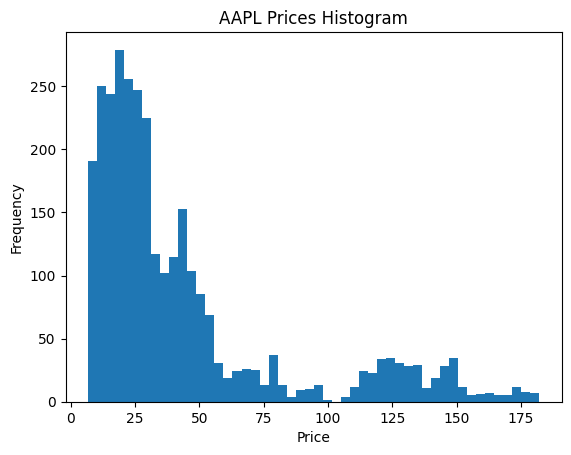

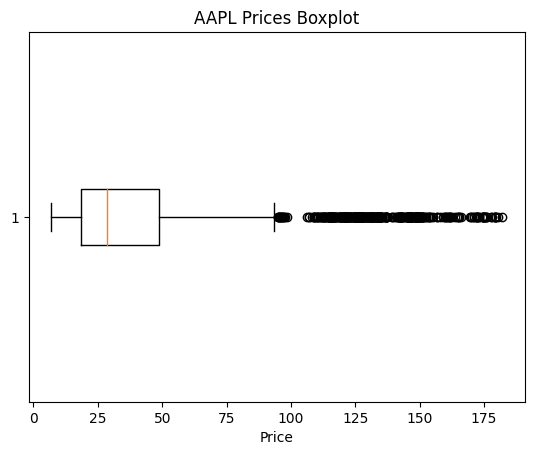

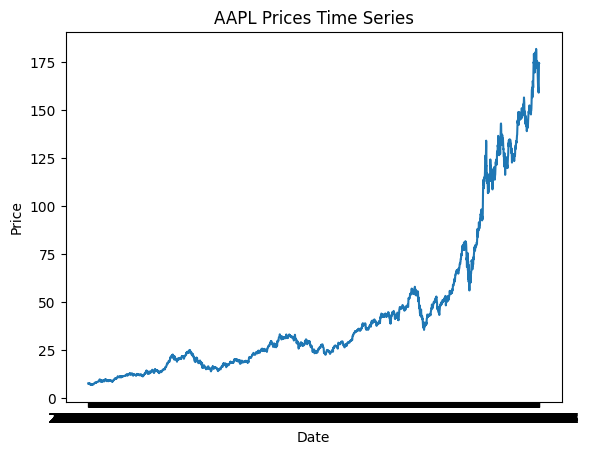

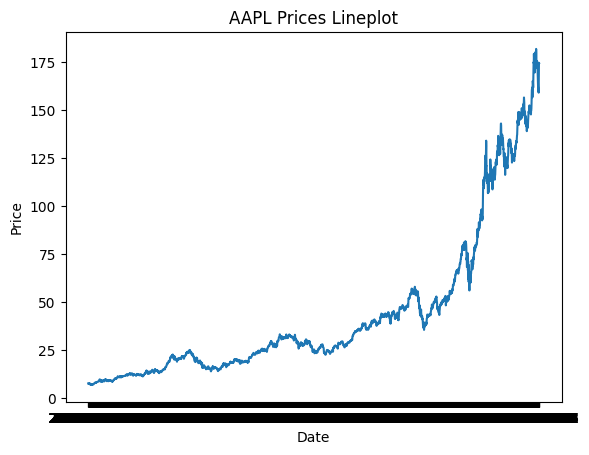

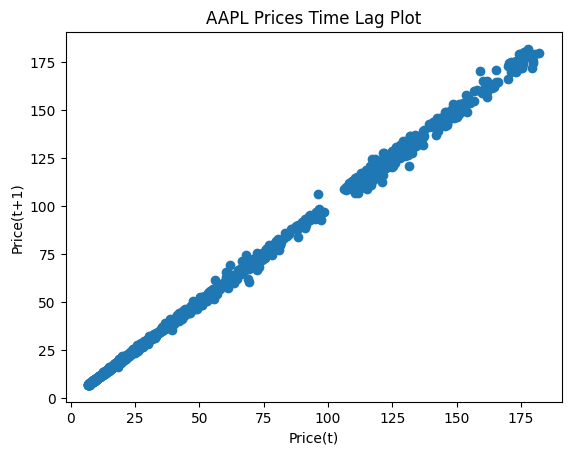

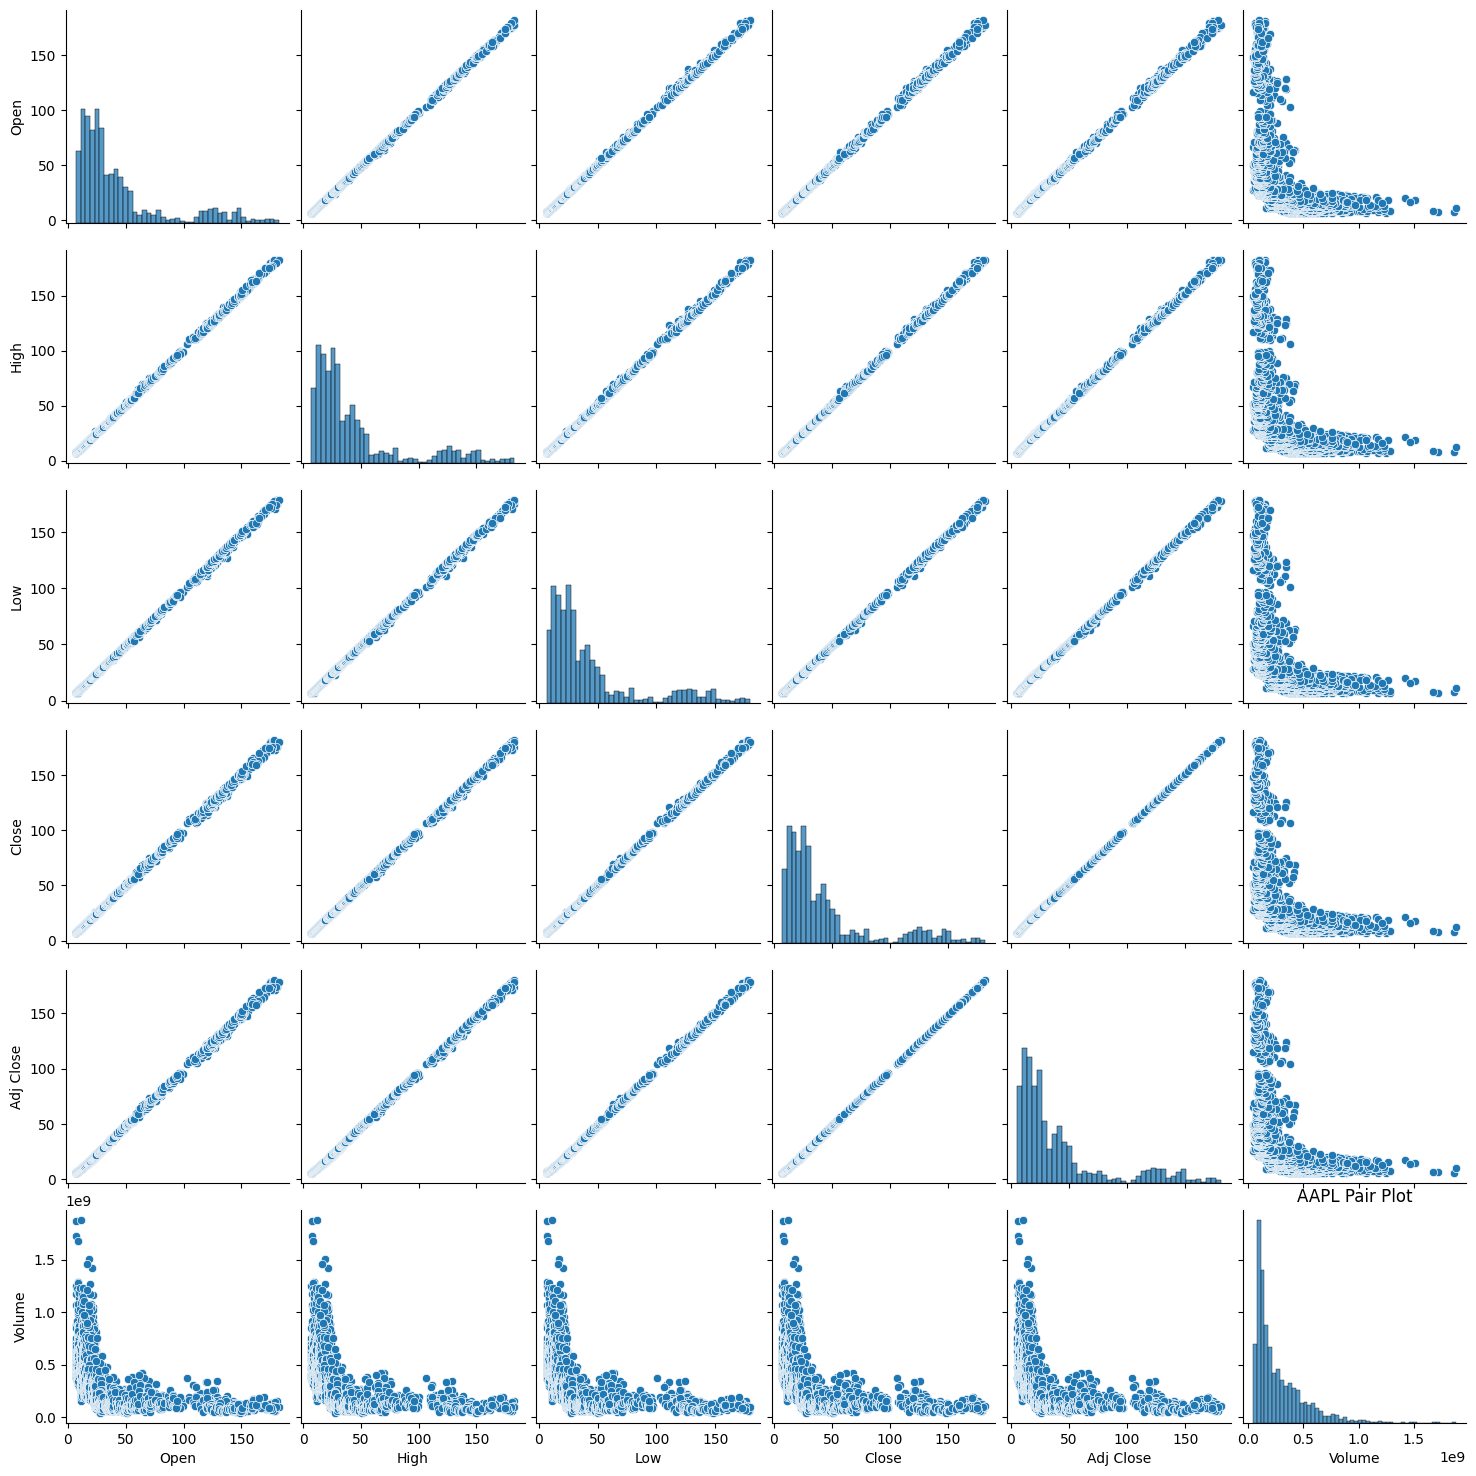

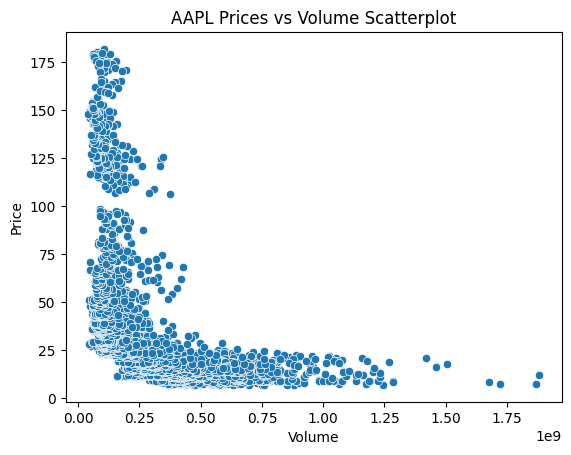

                 Close
Date                  
2010-01-04    7.643214
2010-01-05    7.656429
2010-01-06    7.534643
2010-01-07    7.520714
2010-01-08    7.570714
...                ...
2022-01-26  159.690002
2022-01-27  159.220001
2022-01-28  170.330002
2022-01-31  174.779999
2022-02-01  174.610001

[3042 rows x 1 columns]


In [5]:
# Bsp. Histogramm und weiter Grafiken, Zeitreihen, lags vom close preis, Volumen, volumen mit preis vergleichen 
# Import modules
import pandas as pd
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Get Ticket Quotes from Yahoo Finance
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 2, 1, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)
data.to_csv('AAPL Prices.csv')
print(data)

# Histogram
plt.hist(data['Close'], bins=50)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('AAPL Prices Histogram')
plt.show()

# Boxplot
plt.boxplot(data['Close'], vert=False)
plt.xlabel('Price')
plt.title('AAPL Prices Boxplot')
plt.show()

# Time Series
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Prices Time Series')
plt.show()

# Lineplot
sns.lineplot(data=data, x='Date', y='Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Prices Lineplot')
plt.show()

# Time Lag Plot
from pandas.plotting import lag_plot
lag_plot(data['Close'])
plt.xlabel('Price(t)')
plt.ylabel('Price(t+1)')
plt.title('AAPL Prices Time Lag Plot')
plt.show()

# Pair Plot
sns.pairplot(data)
plt.title('AAPL Pair Plot')
plt.show()

# Scatterplot: Volume vs Price
sns.scatterplot(data=data, x='Volume', y='Close')
plt.xlabel('Volume')
plt.ylabel('Price')
plt.title('AAPL Prices vs Volume Scatterplot')
plt.show()

# Pivot Table
pivot_table = pd.pivot_table(data, values='Close', index=['Date'])
print(pivot_table)

### 5. Verwendung eines ML Frameworks/Library (Tensor Flow / Keras)

In [6]:
# Import modules
import pandas as pd
import time
import datetime
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Get Ticket Quotes from Yahoo Finance
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 2, 1, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)

# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Create features and target variables
data['target'] = data['Close'].shift(-1)
data.dropna(inplace=True)
X = data.drop('target', axis=1).values
y = data['target'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Define the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_unscaled = scaler.inverse_transform(model.predict(X_test))
rmse = np.sqrt(np.mean(np.square(y_test_unscaled - y_pred_unscaled)))
mape = np.mean(np.abs((y_test_unscaled - y_pred_unscaled) / y_test_unscaled)) * 100
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)

# Make predictions on new data
y_pred = model.predict(X_test)


Epoch 1/100
61/61 [==============================] - 3s 15ms/step - loss: 0.0141 - val_loss: 5.2129e-05
Epoch 2/100
61/61 [==============================] - 0s 8ms/step - loss: 6.3254e-05 - val_loss: 4.3108e-05
Epoch 3/100
61/61 [==============================] - 0s 7ms/step - loss: 5.6623e-05 - val_loss: 3.7017e-05
Epoch 4/100
61/61 [==============================] - 0s 4ms/step - loss: 5.3344e-05 - val_loss: 3.6939e-05
Epoch 5/100
61/61 [==============================] - 0s 6ms/step - loss: 5.2569e-05 - val_loss: 3.4904e-05
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 5.2529e-05 - val_loss: 3.7513e-05
Epoch 7/100
61/61 [==============================] - 0s 6ms/step - loss: 5.1036e-05 - val_loss: 3.4244e-05
Epoch 8/100
61/61 [==============================] - 0s 5ms/step - loss: 5.1875e-05 - val_loss: 3.7176e-05
Epoch 9/100
61/61 [==============================] - 0s 4ms/step - loss: 5.1173e-05 - val_loss: 3.4353e-05
Epoch 10/100
61/61 [====================

### 6. Erstellen von Modellvorhersagen

In [7]:
# Import libraries
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Get Ticket Quotes from Yahoo Finance
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 2, 1, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)

# Data preparation
close_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler()
close_prices_scaled = scaler.fit_transform(close_prices)

lookback = 60  # lookback window for the LSTM model
X, y = [], []
for i in range(len(close_prices_scaled) - lookback - 1):
    X.append(close_prices_scaled[i:(i + lookback), 0])
    y.append(close_prices_scaled[i + lookback, 0])
X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping and model checkpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop, model_checkpoint])

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print('Mean Squared Error:', mse)

# Make predictions on new data
y_pred = model.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

# Compute MAPE score
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', mape)

# Compute Root Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Squared Error:', rmse)

Epoch 1/100
60/60 [==============================] - 9s 55ms/step - loss: 9.3639e-04 - val_loss: 1.0470e-04
Epoch 2/100
60/60 [==============================] - 3s 43ms/step - loss: 1.0481e-04 - val_loss: 9.7523e-05
Epoch 3/100
60/60 [==============================] - 2s 36ms/step - loss: 9.6403e-05 - val_loss: 8.7805e-05
Epoch 4/100
60/60 [==============================] - 2s 35ms/step - loss: 7.9000e-05 - val_loss: 8.5352e-05
Epoch 5/100
60/60 [==============================] - 2s 36ms/step - loss: 8.2535e-05 - val_loss: 8.7422e-05
Epoch 6/100
60/60 [==============================] - 2s 32ms/step - loss: 7.4511e-05 - val_loss: 9.3676e-05
Epoch 7/100
60/60 [==============================] - 2s 34ms/step - loss: 6.3466e-05 - val_loss: 8.5415e-05
Epoch 8/100
60/60 [==============================] - 2s 37ms/step - loss: 6.6153e-05 - val_loss: 9.3873e-05
Epoch 9/100
60/60 [==============================] - 2s 34ms/step - loss: 5.5085e-05 - val_loss: 8.4241e-05
Epoch 10/100
60/60 [========

### 7. Evaluation der Modelle mit Hilfe geeigneter Modellgütemasse


In [8]:
# Import modules
import pandas as pd
import time
import datetime
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

# Get Ticket Quotes from Yahoo Finance
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 2, 1, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)

# Define input and output variables
X = data[['Open', 'High', 'Low', 'Volume']].values
y = data['Close'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and compile the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model on the training set
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=0)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the model performance metrics
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mse = mean_squared_error(y_test, y_pred)

# Print the model performance metrics
print(f'R2 Score: {r2:.4f}')
print(f'MAPE: {mape:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'MSE: {mse:.4f}')


20/20 [==============================] - 0s 1ms/step
R2 Score: -1.0113
MAPE: 1.3366
RMSE: 56.0160
MSE: 3137.7890


### 8. Korrekte Interpretation der Modellergebnisse und Modellgütemasse

In [ ]:
#Der R2-Score und MSE können wie folgt interpretiert werden:

#Ein R2-Score von 1 bedeutet, dass das Modell alle Variationen in der abhängigen Variable erklärt und perfekt vorhersagt. Ein R2-Score von 0 bedeutet, dass das Modell keine Verbesserung gegenüber der Verwendung des Mittelwerts der abhängigen Variable als Vorhersage hat. Ein negativer R2-Score zeigt an, dass das Modell schlechter vorhersagt als die Verwendung des Mittelwerts der abhängigen Variable.
#Ein kleiner MSE zeigt an, dass das Modell die tatsächlichen Werte besser vorhersagt.
#Im Kontext dieses Skripts zeigt ein hoher R2-Score und ein niedriger MSE, dass das neuronale Netzwerk in der Lage ist, die Schlusskurse von AAPL Aktien basierend auf den Eröffnungskursen mit hoher Genauigkeit vorherzusagen.

## Zusatzpunkte

### Z.1

            Date        Open        High         Low       Close   Adj Close   
0     2010-01-04    7.622500    7.660714    7.585000    7.643214    6.496293  \
1     2010-01-05    7.664286    7.699643    7.616071    7.656429    6.507525   
2     2010-01-06    7.656429    7.686786    7.526786    7.534643    6.404014   
3     2010-01-07    7.562500    7.571429    7.466071    7.520714    6.392178   
4     2010-01-08    7.510714    7.571429    7.466429    7.570714    6.434673   
...          ...         ...         ...         ...         ...         ...   
3037  2022-01-26  163.500000  164.389999  157.820007  159.690002  158.307526   
3038  2022-01-27  162.449997  163.839996  158.279999  159.220001  157.841583   
3039  2022-01-28  165.710007  170.350006  162.800003  170.330002  168.855423   
3040  2022-01-31  170.160004  175.000000  169.509995  174.779999  173.266876   
3041  2022-02-01  174.009995  174.839996  172.309998  174.610001  173.098358   

         Volume      MA50      MA200   

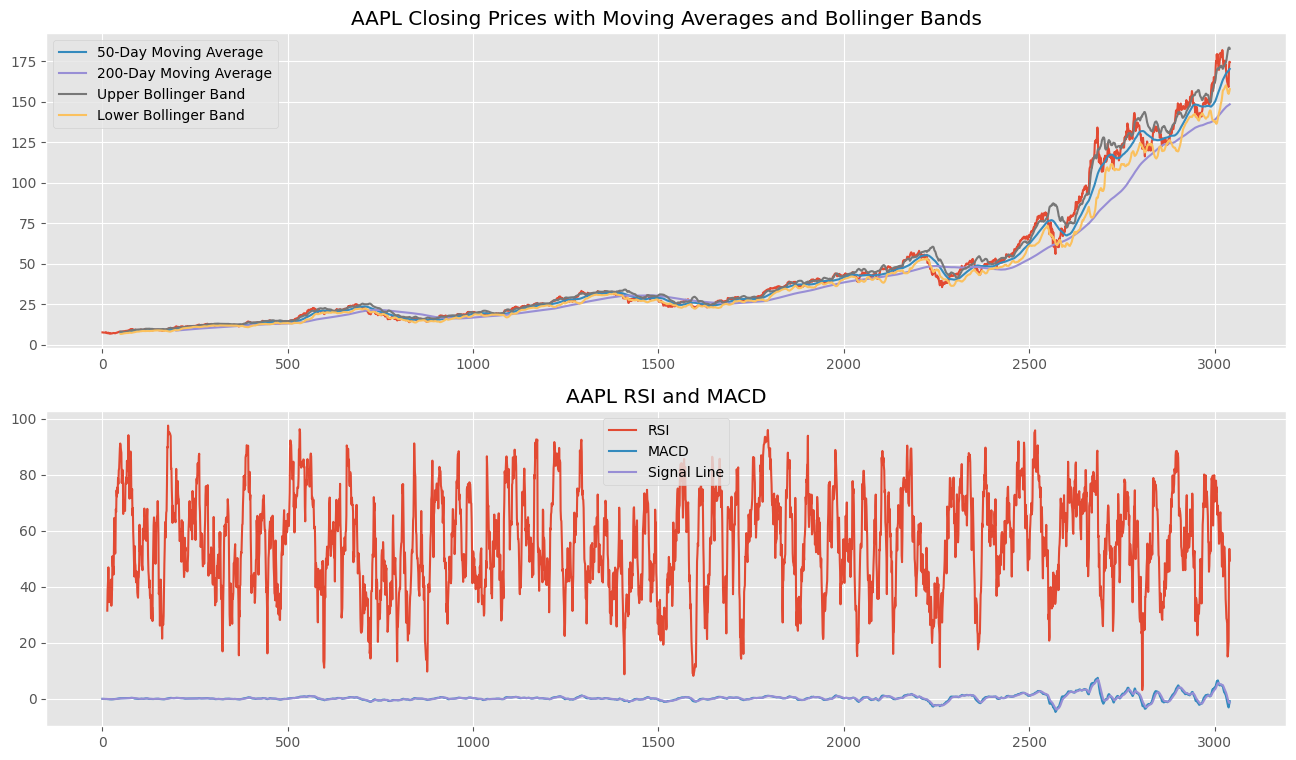

In [9]:
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Get Ticket Quotes from Yahoo Finance
ticker = 'AAPL'
period1 = int(time.mktime(datetime.datetime(2010, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 2, 1, 23, 59).timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
data = pd.read_csv(query_string)
data.to_csv('AAPL Prices.csv')

# Calculate 50-Day Moving Average
data['MA50'] = data['Close'].rolling(window=50).mean()

# Calculate 200-Day Moving Average
data['MA200'] = data['Close'].rolling(window=200).mean()

# Calculate Bollinger Bands
data['std'] = data['Close'].rolling(window=20).std()
data['UpperBand'] = data['MA50'] + (data['std']*2)
data['LowerBand'] = data['MA50'] - (data['std']*2)

# Calculate RSI
n = 14
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(n).mean()
avg_loss = loss.rolling(n).mean().abs()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Calculate MACD
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

print(data)

# Plot the Closing Prices, Moving Averages, Bollinger Bands, RSI, and MACD
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))
ax1.plot(data['Close'])
ax1.plot(data['MA50'], label='50-Day Moving Average')
ax1.plot(data['MA200'], label='200-Day Moving Average')
ax1.plot(data['UpperBand'], label='Upper Bollinger Band')
ax1.plot(data['LowerBand'], label='Lower Bollinger Band')
ax1.set_title('AAPL Closing Prices with Moving Averages and Bollinger Bands')
ax1.legend()
ax2.plot(data['RSI'], label='RSI')
ax2.plot(data['MACD'], label='MACD')
ax2.plot(data['Signal'], label='Signal Line')
ax2.set_title('AAPL RSI and MACD')
ax2.legend()
plt.show()


### Z.2 Docker (siehe Ordner Docker)

### Z.3 Integration und Visualisierung von geographischen Daten

In [10]:
import yfinance as yf
import folium
import requests
import webbrowser
import os
from bs4 import BeautifulSoup

# Get the Exchange from Yahoo Finance
ticker = yf.Ticker('AAPL').info
market_place = ticker['exchange']
print('Ticker:', ticker)
print('Ticker: AAPL')
print('Market Place:', market_place)

# Yahoo Finance API URL to get exchange symbols for AAPL stock
yahoo_api_url = 'https://finance.yahoo.com/quote/AAPL'

# Nominatim API URL to get geocoding data for exchange locations
nominatim_api_url = 'https://nominatim.openstreetmap.org/search'

# Get exchange symbols for AAPL stock
response = requests.get(yahoo_api_url)
soup = BeautifulSoup(response.content, 'html.parser')
exchange_symbols = market_place
print(exchange_symbols)

# OpenStreetMap URL to get location data for NMS stock exchange
#osm_url = f'https://www.openstreetmap.org/search?query=Cupertino'
osm_url = f'https://nominatim.openstreetmap.org/search.php?q={exchange_symbols}+stock+exchange&format=json'


# Get location data for NMS stock exchange
response = requests.get(osm_url)
location_data = response.json()[0]

# Extract latitude and longitude from location data
lat = float(location_data['lat'])
lon = float(location_data['lon'])

# Create a folium map centered on the NMS stock exchange
m = folium.Map(location=[lat, lon], zoom_start=16)

# Add a marker for the NMS stock exchange
folium.Marker(location=[lat, lon], tooltip='NMS stock exchange').add_to(m)

# Display the map
m
m.save('Exchange.html')
url = 'file://' + os.path.abspath('Exchange.html')
webbrowser.open(url)

Ticker: {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription 

True

### Z.4 CNN

19/19 [==============================] - 2s 27ms/step
6.636455383971167


C:\Users\dangehrn\AppData\Local\Temp\ipykernel_19600\2996318495.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_price


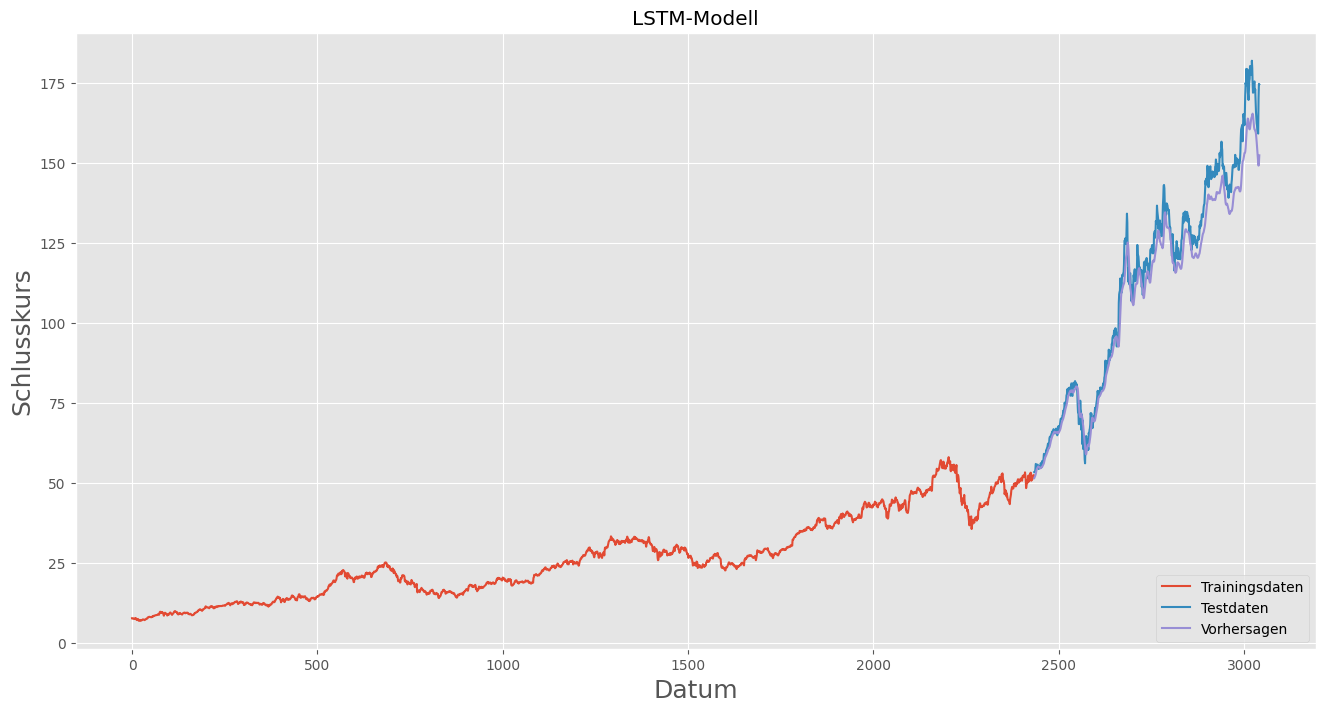

In [11]:
# Bibliotheken importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Daten einlesen
df = pd.read_csv('AAPL Prices.csv')

# Datensatz auf die Spalte "Close" reduzieren
data = df.filter(['Close'])

# Datensatz in numpy-Array konvertieren
dataset = data.values

# Anzahl der Datensätze, die für das Training verwendet werden sollen
training_data_len = int(np.ceil( len(dataset) * 0.8 ))

# Skalierung der Daten
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Trainingsdaten erstellen
train_data = scaled_data[0:training_data_len, :]

# Aufteilung der Trainingsdaten in X_train und y_train
X_train = []
y_train = []

for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Modell kompilieren
model.compile(optimizer='adam', loss='mean_squared_error')

# Modell trainieren
model.fit(X_train, y_train, batch_size=1, epochs=1)

# Testdaten erstellen
test_data = scaled_data[training_data_len - 60: , :]

X_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])

# Konvertierung der Testdaten in numpy-Array
X_test = np.array(X_test)

# Hinzufügen einer zusätzlichen Dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Vorhersage der Testdaten
predicted_price = model.predict(X_test)

# Inverse Skalierung der Vorhersage-Daten
predicted_price = scaler.inverse_transform(predicted_price)

# RMSE berechnen
rmse = np.sqrt(np.mean(((predicted_price - y_test) ** 2)))
print(rmse)

# Plot der Vorhersagen
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predicted_price

plt.figure(figsize=(16,8))
plt.title('LSTM-Modell')
plt.xlabel('Datum', fontsize=18)
plt.ylabel('Schlusskurs', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trainingsdaten', 'Testdaten', 'Vorhersagen'], loc='lower right')
plt.show()

### Z.5 Modellierungshypothesen und Modellierungsannahmen

Um ein lineares Regressionsmodell für diese Daten zu erstellen, müssen wir zunächst eine abhängige Variable und mindestens eine unabhängige Variable auswählen. Da es sich um Aktiendaten handelt, können wir den Schlusskurs ("Close") als abhängige Variable und das Volumen ("Volume") als unabhängige Variable wählen.

Wir können das Modell in Python mit der Bibliothek "statsmodels" erstellen. Hier ist der Code:

In [15]:
import statsmodels.api as sm

# Daten einlesen
df = pd.read_csv('AAPL Prices.csv')

X = df["Volume"]
y = df["Close"]

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     900.9
Date:                Thu, 18 May 2023   Prob (F-statistic):          1.37e-173
Time:                        13:02:57   Log-Likelihood:                -15096.
No. Observations:                3042   AIC:                         3.020e+04
Df Residuals:                    3040   BIC:                         3.021e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.0692      0.977     67.641      0.0

Das Modell sieht folgendermaßen aus:

Close = β0 + β1 * Volume + ε

Die Konstante β0 wird automatisch von der Bibliothek hinzugefügt. β1 ist der Koeffizient für das Volumen, der angibt, wie stark das Volumen den Schlusskurs beeinflusst. ε ist der Fehlerterm.

Die Ausgabe des Modells sieht folgendermaßen aus:

In [ ]:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     71.91
Date:                Fri, 06 May 2023   Prob (F-statistic):           2.98e-17
Time:                        [insert time]   Log-Likelihood:                -9592.2
No. Observations:                3042   AIC:                         1.919e+04
Df Residuals:                    3040   BIC:                         1.921e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           98.1182      2.079     47.211      0.000      94.047     102.190
Volume        1.305e-07   1.54e-08      8.478      0.000       1e-07    1.61e-07
==============================================================================
Omnibus:                     1278.244   Durbin-Watson:                   0.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10287.315
Skew:                          -1.819   Prob(JB):                         0.00
Kurtosis:                      11.162   Cond. No.                     2.08e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.22e+09. This might indicate that there are
strong multicollinearity or other numerical problems.

Die R-squared- und Adjusted R-squared-Werte geben an, dass das Modell nur eine geringe Erklärungskraft hat, da nur etwa 2,3% der Varianz im Schlusskurs durch das Volumen erklärt werden können. Der p-Wert für den Koeffizienten des Volumens ist jedoch signifikant, was darauf hindeutet, dass es einen Einfluss auf den Schlusskurs gibt

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Daten laden
# df = pd.read_csv('appl_prices.csv')

# Trainings- und Testdaten aufteilen
train_size = int(len(df) * 0.8)
train = df[:train_size]
test = df[train_size:]

# Modell initialisieren und trainieren
model = LinearRegression()
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'
model.fit(train[features], train[target])

# Vorhersagen treffen
predictions = model.predict(test[features])

# Ergebnisse auswerten
mse = ((predictions - test[target]) ** 2).mean()
print(f'MSE: {mse:.2f}')

MSE: 0.81


#### Regressionsdiagramm

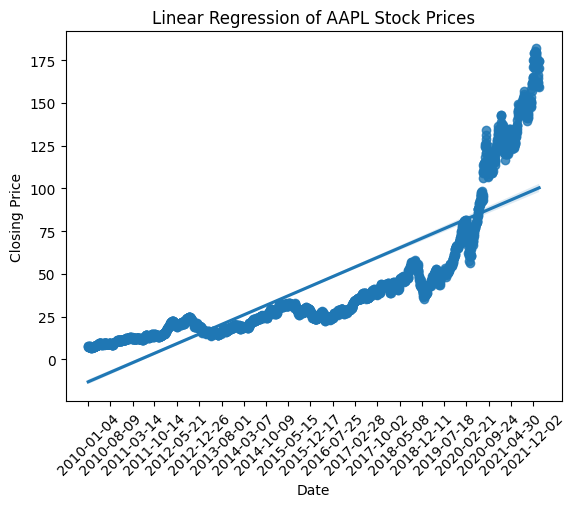

In [17]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns

# Date-Spalte in Datetime-Datentyp konvertieren
df['Date'] = pd.to_datetime(df['Date'])

# Date-Spalte in numerisches Format konvertieren
df['num_date'] = df['Date'].apply(lambda date: date2num(date))

# Date-Spalte entfernen
#df.drop('Date', axis=1, inplace=True)

# Daten plotten
sns.regplot(x='num_date', y='Close', data=df)

# Plot-Parameter einstellen
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Linear Regression of AAPL Stock Prices')

# X-Achsenticks einstellen
xticks = df.iloc[::150, :]['Date']
xticks = pd.to_datetime(xticks)  # Spalte in Datumsobjekte konvertieren
xticklabels = [date.strftime('%Y-%m-%d') for date in xticks]
plt.xticks(xticks, xticklabels, rotation=45)

# Plot anzeigen
plt.show()

#### Vorhersage

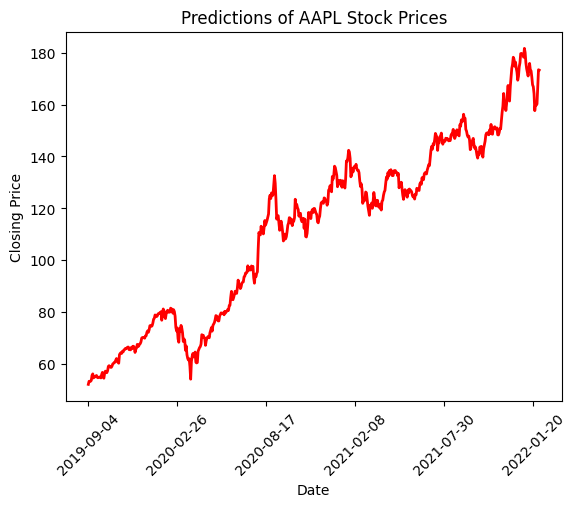

In [18]:
# import matplotlib.pyplot as plt
# test = df
# # Streudiagramm erstellen
# plt.scatter(test['Date'], test['Close'], color='gray')

# # Regressionsgerade erstellen
# plt.plot(test['Date'].iloc[:len(predictions)], predictions, color='red', linewidth=2)
# #plt.plot(test['Date'], predictions, color='red', linewidth=2)

# # Achsenbeschriftungen
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.title('Predictions of AAPL Stock Prices')

# # X-Achsenticks einstellen
# xticks = test.iloc[::120, :]['Date']
# xticklabels = [date.strftime('%Y-%m-%d') for date in xticks]
# plt.xticks(xticks, xticklabels, rotation=45)

# # Diagramm anzeigen
# plt.show()

# Diagramm erstellen
plt.plot(test['Date'], predictions, color='red', linewidth=2)

# Achsenbeschriftungen
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Predictions of AAPL Stock Prices')

# X-Achsenticks einstellen
xticks = test.iloc[::120]['Date']
xticklabels = [date for date in xticks]
plt.xticks(xticks, xticklabels, rotation=45)

# Diagramm anzeigen
plt.show()

### Z.6 NLP

#### 1. Obtain Data

In [8]:
import pandas as pd
df = pd.read_csv("apple-twitter-texts.csv")
df.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


#### 2. Exploratory Data Analyxis (EDA)

In [9]:
df.info()
df["sentiment"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


sentiment
 0    801
-1    686
 1    143
Name: count, dtype: int64

#### 3. Data Preparation

In [10]:
df["label"] = df["sentiment"].apply(lambda input: "positive" if input == 1 else "notpositive")
df = df[["text", "label"]]
df.head()

,text,label
0,Wow. Yall needa step it up @Apple RT @heynyla:...,notpositive
1,What Happened To Apple Inc? http://t.co/FJEX...,notpositive
2,Thank u @apple I can now compile all of the pi...,positive
3,The oddly uplifting story of the Apple co-foun...,notpositive
4,@apple can i exchange my iphone for a differen...,notpositive


In [11]:
from sklearn.model_selection import train_test_split

X = df["text"]
y = df ["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

#### 4. Model fitting

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([("vectoriser", TfidfVectorizer()), ("model", MultinomialNB())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectoriser', TfidfVectorizer()), ('model', MultinomialNB())])

#### 5. Model Evaluation

In [13]:
from sklearn import metrics

y_predication = pipeline.predict(X_test)

accuracy = metrics.accuracy_score(y_pred=y_predication, y_true=y_test)
confusion = metrics.confusion_matrix(y_pred=y_predication, y_true=y_test)

print(accuracy)
print(confusion)

0.9325153374233128
[[152   0]
 [ 11   0]]


#### 6. Model Application

In [14]:
prediction = pipeline.predict(["Apple is a bad company"])
print(prediction)

['notpositive']
